In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('dataset1.csv')
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,Time,Faults,CDF
0,1,1,1
1,2,6,7
2,3,0,7
3,4,2,9
4,5,0,9


In [6]:
data = data.drop(columns = 'Faults')
data.head()

,Time,CDF
0,1,1
1,2,7
2,3,7
3,4,9
4,5,9


In [7]:
x = data['Time']
y = data['CDF']

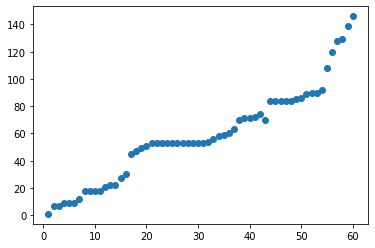

In [8]:
plt.scatter(x,y)

In [10]:
def hypo(m,c,x):
    return m*x + c

In [11]:
m = 5
c = 7

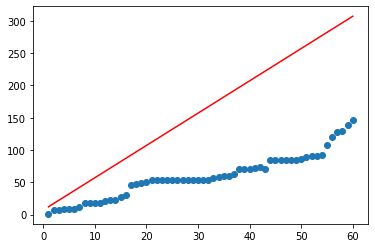

In [14]:
y1 = hypo(m,c,x)
plt.scatter(x,y)
plt.plot(x,y1,'red')

In [103]:
def j(y,y1):
    res = (y-y1)**2
    res = sum(res)
    res = res*(1/len(y))

    return res

In [39]:
def jm(m,c,x,y):
    res = (y-hypo(m,c,x))*x
    res = sum(res)
    res = -2 * res * (1/len(y))

    return res

def jc(m,c,x,y):
    res = (y - hypo(m,c,x))
    res = sum(res)
    res = -(1/len(y)) * res

    return res

In [93]:
eta = 0.0001

for i in range(10000):
    m = m - eta * jm(m,c,x,y)
    c = c - eta * jc(m,c,x,y)

In [94]:
m, c

(1.790188074012629, 5.37665593636968)

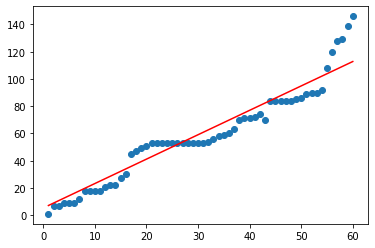

In [95]:
y2 = hypo(m,c,x)

plt.scatter(x,y)
plt.plot(x,y2,'red')

In [104]:
j(y,y2)

91.29849589626028

In [ ]:
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
	solutions = list()
	# generate an initial point
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	score = objective(x[0], x[1])
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent updates
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(bounds.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			# mhat(t) = m(t) / (1 - beta1(t))
			mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
			x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
		# evaluate candidate point
		score = objective(x[0], x[1])
		# keep track of solutions
		solutions.append(x.copy())
		# report progress
		print('>%d f(%s) = %.5f' % (t, x, score))
	return solutions